In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cd /Users/caz3so/workspaces/thesis/bin/MOTIF_ANALYSIS/output/intersection/MOODS/DHS/

/Users/caz3so/workspaces/thesis/bin/MOTIF_ANALYSIS/output/intersection/MOODS/DHS


In [3]:
df6 = pd.read_csv("DHS_MOODS_p6.bed", sep="\t", 
                header=None,
                usecols=[6, 10],
                names=["BIN_ID", "TF_NAME"], 
                low_memory=False)

In [4]:
df5 = pd.read_csv("DHS_MOODS_p5.bed", sep="\t", 
                header=None,
                usecols=[6, 10],
                names=["BIN_ID", "TF_NAME"], 
                low_memory=False)

In [5]:
df4 = pd.read_csv("DHS_MOODS_p4.bed", sep="\t", 
                header=None,
                usecols=[6, 10],
                names=["BIN_ID", "TF_NAME"], 
                low_memory=False)

In [6]:
cd /Users/caz3so/workspaces/thesis/bin/MOTIF_ANALYSIS/output/intersection/CHIP/DHS

/Users/caz3so/workspaces/thesis/bin/MOTIF_ANALYSIS/output/intersection/CHIP/DHS


In [7]:
df_CHIP_MODE1 = pd.read_csv("DHS_percentile_0_MODE1.bed", sep="\t", 
                header=None,
                usecols=[6, 10],
                names=["BIN_ID", "TF_NAME"], 
                low_memory=False)

In [8]:
df_CHIP_MODE2 = pd.read_csv("DHS_percentile_0_MODE2.bed", sep="\t", 
                header=None,
                usecols=[6, 10],
                names=["BIN_ID", "TF_NAME"], 
                low_memory=False)

In [9]:
df_CHIP_MODE3 = pd.read_csv("DHS_percentile_0_MODE3.bed", sep="\t", 
                header=None,
                usecols=[6, 10],
                names=["BIN_ID", "TF_NAME"], 
                low_memory=False)

In [10]:
df_CHIP_MODE4 = pd.read_csv("DHS_percentile_0_MODE4.bed", sep="\t", 
                header=None,
                usecols=[6, 10],
                names=["BIN_ID", "TF_NAME"], 
                low_memory=False)

In [11]:
df_CHIP_MODE1["CHIP_P75_MODE1"] = "CHIP_P75_MODE1"
df_CHIP_MODE2["CHIP_P75_MODE2"] = "CHIP_P75_MODE2"
df_CHIP_MODE3["CHIP_P75_MODE3"] = "CHIP_P75_MODE3"
df_CHIP_MODE4["CHIP_P75_MODE4"] = "CHIP_P75_MODE4"

df6["MOODS_P6"] = "MOODS_P6"
df5["MOODS_P5"] = "MOODS_P5"
df4["MOODS_P4"] = "MOODS_P4"

In [12]:
gp_CHIP_MODE1 = df_CHIP_MODE1.groupby(["BIN_ID","TF_NAME"]).count()
gp_CHIP_MODE2 = df_CHIP_MODE2.groupby(["BIN_ID","TF_NAME"]).count()
gp_CHIP_MODE3 = df_CHIP_MODE3.groupby(["BIN_ID","TF_NAME"]).count()
gp_CHIP_MODE4 = df_CHIP_MODE4.groupby(["BIN_ID","TF_NAME"]).count()

gp6 = df6.groupby(["BIN_ID","TF_NAME"]).count()
gp5 = df5.groupby(["BIN_ID","TF_NAME"]).count()
gp4 = df4.groupby(["BIN_ID","TF_NAME"]).count()

In [13]:
dfcon = pd.concat([gp6, gp5, gp4, gp_CHIP_MODE1, gp_CHIP_MODE2, gp_CHIP_MODE3, gp_CHIP_MODE4], axis=1)

In [ ]:
dfcon

In [14]:
dfcon = dfcon.fillna(0)

In [15]:
dfcon = dfcon.apply(lambda x: [y if y <= 1 else 1 for y in x])

In [16]:
dfcon["P6:CHIP_MODE1"] = dfcon["MOODS_P6"].apply(str) + ":" + dfcon["CHIP_P75_MODE1"].apply(str)
dfcon["P5:CHIP_MODE1"] = dfcon["MOODS_P5"].apply(str) + ":" + dfcon["CHIP_P75_MODE1"].apply(str)
dfcon["P4:CHIP_MODE1"] = dfcon["MOODS_P4"].apply(str) + ":" + dfcon["CHIP_P75_MODE1"].apply(str)

dfcon["P6:CHIP_MODE2"] = dfcon["MOODS_P6"].apply(str) + ":" + dfcon["CHIP_P75_MODE2"].apply(str)
dfcon["P5:CHIP_MODE2"] = dfcon["MOODS_P5"].apply(str) + ":" + dfcon["CHIP_P75_MODE2"].apply(str)
dfcon["P4:CHIP_MODE2"] = dfcon["MOODS_P4"].apply(str) + ":" + dfcon["CHIP_P75_MODE2"].apply(str)

dfcon["P6:CHIP_MODE3"] = dfcon["MOODS_P6"].apply(str) + ":" + dfcon["CHIP_P75_MODE3"].apply(str)
dfcon["P5:CHIP_MODE3"] = dfcon["MOODS_P5"].apply(str) + ":" + dfcon["CHIP_P75_MODE3"].apply(str)
dfcon["P4:CHIP_MODE3"] = dfcon["MOODS_P4"].apply(str) + ":" + dfcon["CHIP_P75_MODE3"].apply(str)

dfcon["P6:CHIP_MODE4"] = dfcon["MOODS_P6"].apply(str) + ":" + dfcon["CHIP_P75_MODE4"].apply(str)
dfcon["P5:CHIP_MODE4"] = dfcon["MOODS_P5"].apply(str) + ":" + dfcon["CHIP_P75_MODE4"].apply(str)
dfcon["P4:CHIP_MODE4"] = dfcon["MOODS_P4"].apply(str) + ":" + dfcon["CHIP_P75_MODE4"].apply(str)

In [17]:
dfcon.reset_index(inplace=True)

In [18]:
gp_p6_MODE1 = dfcon.groupby(["TF_NAME", "P6:CHIP_MODE1"]).count()
gp_p5_MODE1 = dfcon.groupby(["TF_NAME", "P5:CHIP_MODE1"]).count()
gp_p4_MODE1 = dfcon.groupby(["TF_NAME", "P4:CHIP_MODE1"]).count()

gp_p6_MODE2 = dfcon.groupby(["TF_NAME", "P6:CHIP_MODE2"]).count()
gp_p5_MODE2 = dfcon.groupby(["TF_NAME", "P5:CHIP_MODE2"]).count()
gp_p4_MODE2 = dfcon.groupby(["TF_NAME", "P4:CHIP_MODE2"]).count()

gp_p6_MODE3 = dfcon.groupby(["TF_NAME", "P6:CHIP_MODE3"]).count()
gp_p5_MODE3 = dfcon.groupby(["TF_NAME", "P5:CHIP_MODE3"]).count()
gp_p4_MODE3 = dfcon.groupby(["TF_NAME", "P4:CHIP_MODE3"]).count()

gp_p6_MODE4 = dfcon.groupby(["TF_NAME", "P6:CHIP_MODE4"]).count()
gp_p5_MODE4 = dfcon.groupby(["TF_NAME", "P5:CHIP_MODE4"]).count()
gp_p4_MODE4 = dfcon.groupby(["TF_NAME", "P4:CHIP_MODE4"]).count()

In [19]:
gp_p6_MODE1.reset_index(inplace=True)
gp_p5_MODE1.reset_index(inplace=True)
gp_p4_MODE1.reset_index(inplace=True)

gp_p6_MODE2.reset_index(inplace=True)
gp_p5_MODE2.reset_index(inplace=True)
gp_p4_MODE2.reset_index(inplace=True)

gp_p6_MODE3.reset_index(inplace=True)
gp_p5_MODE3.reset_index(inplace=True)
gp_p4_MODE3.reset_index(inplace=True)

gp_p6_MODE4.reset_index(inplace=True)
gp_p5_MODE4.reset_index(inplace=True)
gp_p4_MODE4.reset_index(inplace=True)

In [20]:
gp_p6_MODE1_piv = gp_p6_MODE1.pivot(index="TF_NAME", columns="P6:CHIP_MODE1")
gp_p5_MODE1_piv = gp_p5_MODE1.pivot(index="TF_NAME", columns="P5:CHIP_MODE1")
gp_p4_MODE1_piv = gp_p4_MODE1.pivot(index="TF_NAME", columns="P4:CHIP_MODE1")

gp_p6_MODE2_piv = gp_p6_MODE2.pivot(index="TF_NAME", columns="P6:CHIP_MODE2")
gp_p5_MODE2_piv = gp_p5_MODE2.pivot(index="TF_NAME", columns="P5:CHIP_MODE2")
gp_p4_MODE2_piv = gp_p4_MODE2.pivot(index="TF_NAME", columns="P4:CHIP_MODE2")

gp_p6_MODE3_piv = gp_p6_MODE3.pivot(index="TF_NAME", columns="P6:CHIP_MODE3")
gp_p5_MODE3_piv = gp_p5_MODE3.pivot(index="TF_NAME", columns="P5:CHIP_MODE3")
gp_p4_MODE3_piv = gp_p4_MODE3.pivot(index="TF_NAME", columns="P4:CHIP_MODE3")

gp_p6_MODE4_piv = gp_p6_MODE4.pivot(index="TF_NAME", columns="P6:CHIP_MODE4")
gp_p5_MODE4_piv = gp_p5_MODE4.pivot(index="TF_NAME", columns="P5:CHIP_MODE4")
gp_p4_MODE4_piv = gp_p4_MODE4.pivot(index="TF_NAME", columns="P4:CHIP_MODE4")

In [21]:
gp_p6_MODE1 = gp_p6_MODE1_piv["BIN_ID"]
gp_p5_MODE1 = gp_p5_MODE1_piv["BIN_ID"]
gp_p4_MODE1 = gp_p4_MODE1_piv["BIN_ID"]

gp_p6_MODE2 = gp_p6_MODE2_piv["BIN_ID"]
gp_p5_MODE2 = gp_p5_MODE2_piv["BIN_ID"]
gp_p4_MODE2 = gp_p4_MODE2_piv["BIN_ID"]

gp_p6_MODE3 = gp_p6_MODE3_piv["BIN_ID"]
gp_p5_MODE3 = gp_p5_MODE3_piv["BIN_ID"]
gp_p4_MODE3 = gp_p4_MODE3_piv["BIN_ID"]

gp_p6_MODE4 = gp_p6_MODE4_piv["BIN_ID"]
gp_p5_MODE4 = gp_p5_MODE4_piv["BIN_ID"]
gp_p4_MODE4 = gp_p4_MODE4_piv["BIN_ID"]

In [22]:
gp_p6_MODE1.fillna(0, inplace=True)
gp_p5_MODE1.fillna(0, inplace=True)
gp_p4_MODE1.fillna(0, inplace=True)

gp_p6_MODE2.fillna(0, inplace=True)
gp_p5_MODE2.fillna(0, inplace=True)
gp_p4_MODE2.fillna(0, inplace=True)

gp_p6_MODE3.fillna(0, inplace=True)
gp_p5_MODE3.fillna(0, inplace=True)
gp_p4_MODE3.fillna(0, inplace=True)

gp_p6_MODE4.fillna(0, inplace=True)
gp_p5_MODE4.fillna(0, inplace=True)
gp_p4_MODE4.fillna(0, inplace=True)


/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [23]:
gp_p6_MODE1.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p5_MODE1.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p4_MODE1.columns = ["Difference", "CHIP", "MOODS", "Intersection"]

gp_p6_MODE2.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p5_MODE2.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p4_MODE2.columns = ["Difference", "CHIP", "MOODS", "Intersection"]

gp_p6_MODE3.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p5_MODE3.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p4_MODE3.columns = ["Difference", "CHIP", "MOODS", "Intersection"]

gp_p6_MODE4.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p5_MODE4.columns = ["Difference", "CHIP", "MOODS", "Intersection"]
gp_p4_MODE4.columns = ["Difference", "CHIP", "MOODS", "Intersection"]

In [24]:
gp_p6_MODE1["CHIP_total"] = gp_p6_MODE1["CHIP"] + gp_p6_MODE1["Intersection"]
gp_p5_MODE1["CHIP_total"] = gp_p5_MODE1["CHIP"] + gp_p5_MODE1["Intersection"]
gp_p4_MODE1["CHIP_total"] = gp_p4_MODE1["CHIP"] + gp_p4_MODE1["Intersection"]

gp_p6_MODE2["CHIP_total"] = gp_p6_MODE2["CHIP"] + gp_p6_MODE2["Intersection"]
gp_p5_MODE2["CHIP_total"] = gp_p5_MODE2["CHIP"] + gp_p5_MODE2["Intersection"]
gp_p4_MODE2["CHIP_total"] = gp_p4_MODE2["CHIP"] + gp_p4_MODE2["Intersection"]

gp_p6_MODE3["CHIP_total"] = gp_p6_MODE3["CHIP"] + gp_p6_MODE3["Intersection"]
gp_p5_MODE3["CHIP_total"] = gp_p5_MODE3["CHIP"] + gp_p5_MODE3["Intersection"]
gp_p4_MODE3["CHIP_total"] = gp_p4_MODE3["CHIP"] + gp_p4_MODE3["Intersection"]

gp_p6_MODE4["CHIP_total"] = gp_p6_MODE4["CHIP"] + gp_p6_MODE4["Intersection"]
gp_p5_MODE4["CHIP_total"] = gp_p5_MODE4["CHIP"] + gp_p5_MODE4["Intersection"]
gp_p4_MODE4["CHIP_total"] = gp_p4_MODE4["CHIP"] + gp_p4_MODE4["Intersection"]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [25]:
gp_p6_MODE1["MOODS_total"] = gp_p6_MODE1["MOODS"] + gp_p6_MODE1["Intersection"]
gp_p5_MODE1["MOODS_total"] = gp_p5_MODE1["MOODS"] + gp_p5_MODE1["Intersection"]
gp_p4_MODE1["MOODS_total"] = gp_p4_MODE1["MOODS"] + gp_p4_MODE1["Intersection"]

gp_p6_MODE2["MOODS_total"] = gp_p6_MODE2["MOODS"] + gp_p6_MODE2["Intersection"]
gp_p5_MODE2["MOODS_total"] = gp_p5_MODE2["MOODS"] + gp_p5_MODE2["Intersection"]
gp_p4_MODE2["MOODS_total"] = gp_p4_MODE2["MOODS"] + gp_p4_MODE2["Intersection"]

gp_p6_MODE3["MOODS_total"] = gp_p6_MODE3["MOODS"] + gp_p6_MODE3["Intersection"]
gp_p5_MODE3["MOODS_total"] = gp_p5_MODE3["MOODS"] + gp_p5_MODE3["Intersection"]
gp_p4_MODE3["MOODS_total"] = gp_p4_MODE3["MOODS"] + gp_p4_MODE3["Intersection"]

gp_p6_MODE4["MOODS_total"] = gp_p6_MODE4["MOODS"] + gp_p6_MODE4["Intersection"]
gp_p5_MODE4["MOODS_total"] = gp_p5_MODE4["MOODS"] + gp_p5_MODE4["Intersection"]
gp_p4_MODE4["MOODS_total"] = gp_p4_MODE4["MOODS"] + gp_p4_MODE4["Intersection"]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [26]:
gp_p6_MODE1["Precision"] = gp_p6_MODE1["Intersection"] / gp_p6_MODE1["MOODS_total"]
gp_p5_MODE1["Precision"] = gp_p5_MODE1["Intersection"] / gp_p5_MODE1["MOODS_total"]
gp_p4_MODE1["Precision"] = gp_p4_MODE1["Intersection"] / gp_p4_MODE1["MOODS_total"]

gp_p6_MODE2["Precision"] = gp_p6_MODE2["Intersection"] / gp_p6_MODE2["MOODS_total"]
gp_p5_MODE2["Precision"] = gp_p5_MODE2["Intersection"] / gp_p5_MODE2["MOODS_total"]
gp_p4_MODE2["Precision"] = gp_p4_MODE2["Intersection"] / gp_p4_MODE2["MOODS_total"]

gp_p6_MODE3["Precision"] = gp_p6_MODE3["Intersection"] / gp_p6_MODE3["MOODS_total"]
gp_p5_MODE3["Precision"] = gp_p5_MODE3["Intersection"] / gp_p5_MODE3["MOODS_total"]
gp_p4_MODE3["Precision"] = gp_p4_MODE3["Intersection"] / gp_p4_MODE3["MOODS_total"]

gp_p6_MODE4["Precision"] = gp_p6_MODE4["Intersection"] / gp_p6_MODE4["MOODS_total"]
gp_p5_MODE4["Precision"] = gp_p5_MODE4["Intersection"] / gp_p5_MODE4["MOODS_total"]
gp_p4_MODE4["Precision"] = gp_p4_MODE4["Intersection"] / gp_p4_MODE4["MOODS_total"]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [27]:
gp_p6_MODE1["Recall"] = gp_p6_MODE1["Intersection"] / gp_p6_MODE1["CHIP_total"]
gp_p5_MODE1["Recall"] = gp_p5_MODE1["Intersection"] / gp_p5_MODE1["CHIP_total"]
gp_p4_MODE1["Recall"] = gp_p4_MODE1["Intersection"] / gp_p4_MODE1["CHIP_total"]

gp_p6_MODE2["Recall"] = gp_p6_MODE2["Intersection"] / gp_p6_MODE2["CHIP_total"]
gp_p5_MODE2["Recall"] = gp_p5_MODE2["Intersection"] / gp_p5_MODE2["CHIP_total"]
gp_p4_MODE2["Recall"] = gp_p4_MODE2["Intersection"] / gp_p4_MODE2["CHIP_total"]

gp_p6_MODE3["Recall"] = gp_p6_MODE3["Intersection"] / gp_p6_MODE3["CHIP_total"]
gp_p5_MODE3["Recall"] = gp_p5_MODE3["Intersection"] / gp_p5_MODE3["CHIP_total"]
gp_p4_MODE3["Recall"] = gp_p4_MODE3["Intersection"] / gp_p4_MODE3["CHIP_total"]

gp_p6_MODE4["Recall"] = gp_p6_MODE4["Intersection"] / gp_p6_MODE4["CHIP_total"]
gp_p5_MODE4["Recall"] = gp_p5_MODE4["Intersection"] / gp_p5_MODE4["CHIP_total"]
gp_p4_MODE4["Recall"] = gp_p4_MODE4["Intersection"] / gp_p4_MODE4["CHIP_total"]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [28]:
gp_p6_MODE1.reset_index(inplace=True)
gp_p5_MODE1.reset_index(inplace=True)
gp_p4_MODE1.reset_index(inplace=True)

gp_p6_MODE2.reset_index(inplace=True)
gp_p5_MODE2.reset_index(inplace=True)
gp_p4_MODE2.reset_index(inplace=True)

gp_p6_MODE3.reset_index(inplace=True)
gp_p5_MODE3.reset_index(inplace=True)
gp_p4_MODE3.reset_index(inplace=True)

gp_p6_MODE4.reset_index(inplace=True)
gp_p5_MODE4.reset_index(inplace=True)
gp_p4_MODE4.reset_index(inplace=True)

In [29]:
gp_p6_MODE1.fillna(0, inplace=True)
gp_p5_MODE1.fillna(0, inplace=True)
gp_p4_MODE1.fillna(0, inplace=True)

gp_p6_MODE2.fillna(0, inplace=True)
gp_p5_MODE2.fillna(0, inplace=True)
gp_p4_MODE2.fillna(0, inplace=True)

gp_p6_MODE3.fillna(0, inplace=True)
gp_p5_MODE3.fillna(0, inplace=True)
gp_p4_MODE3.fillna(0, inplace=True)

gp_p6_MODE4.fillna(0, inplace=True)
gp_p5_MODE4.fillna(0, inplace=True)
gp_p4_MODE4.fillna(0, inplace=True)


In [30]:
gp_p6_MODE1.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p5_MODE1.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p4_MODE1.replace([np.inf, -np.inf], np.nan, inplace=True)

gp_p6_MODE2.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p5_MODE2.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p4_MODE2.replace([np.inf, -np.inf], np.nan, inplace=True)

gp_p6_MODE3.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p5_MODE3.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p4_MODE3.replace([np.inf, -np.inf], np.nan, inplace=True)

gp_p6_MODE4.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p5_MODE4.replace([np.inf, -np.inf], np.nan, inplace=True)
gp_p4_MODE4.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-p

In [31]:
gp_p6_MODE1["Pvalue"] = "MODE1 1x10e-6"
gp_p5_MODE1["Pvalue"] = "MODE1 1x10e-5"
gp_p4_MODE1["Pvalue"] = "MODE1 1x10e-4"

gp_p6_MODE2["Pvalue"] = "MODE2 1x10e-6"
gp_p5_MODE2["Pvalue"] = "MODE2 1x10e-5"
gp_p4_MODE2["Pvalue"] = "MODE2 1x10e-4"

gp_p6_MODE3["Pvalue"] = "MODE3 1x10e-6"
gp_p5_MODE3["Pvalue"] = "MODE3 1x10e-5"
gp_p4_MODE3["Pvalue"] = "MODE3 1x10e-4"

gp_p6_MODE4["Pvalue"] = "MODE4 1x10e-6"
gp_p5_MODE4["Pvalue"] = "MODE4 1x10e-5"
gp_p4_MODE4["Pvalue"] = "MODE4 1x10e-4"

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [63]:
prdf = pd.concat([gp_p6_MODE1, gp_p5_MODE1, gp_p4_MODE1, gp_p6_MODE2, gp_p5_MODE2, gp_p4_MODE2, gp_p6_MODE3, gp_p5_MODE3, gp_p4_MODE3, gp_p6_MODE4, gp_p5_MODE4, gp_p4_MODE4])

In [64]:
prdf_piv = prdf.pivot(index="TF_NAME", columns="Pvalue")

In [65]:
prdf_piv_pre = prdf_piv["Precision"]
prdf_piv_rec = prdf_piv["Recall"]

In [66]:
prdf_piv_pre.reset_index(inplace=True)
prdf_piv_rec.reset_index(inplace=True)

In [67]:
df_zero = gp_p4_MODE1[gp_p4_MODE1.MOODS == 0]

In [68]:
df_zero_names = df_zero["TF_NAME"].unique()

In [69]:
for i in df_zero_names:
    prdf_piv_pre = prdf_piv_pre[prdf_piv_pre.TF_NAME != i]
    prdf_piv_rec = prdf_piv_rec[prdf_piv_rec.TF_NAME != i]

In [70]:
prdf_piv_pre.set_index("TF_NAME", inplace=True)
prdf_piv_rec.set_index("TF_NAME", inplace=True)

In [40]:
prdf_piv_pre = prdf_piv_pre.sort_values("MODE1 1x10e-4")
prdf_piv_rec = prdf_piv_rec.sort_values("MODE1 1x10e-4")

In [71]:
prdf_piv_f1 = (2*((prdf_piv_pre*prdf_piv_rec)/(prdf_piv_pre+prdf_piv_rec)))

In [42]:
prdf_piv_f1 = prdf_piv_f1.sort_values("MODE1 1x10e-4")

In [ ]:
heat = sns.clustermap(prdf_piv_pre, linewidths=.01, row_cluster=False, col_cluster=False, cmap="BuPu")

In [ ]:
heat = sns.clustermap(prdf_piv_rec, linewidths=.01, row_cluster=False, col_cluster=False, cmap="BuPu")

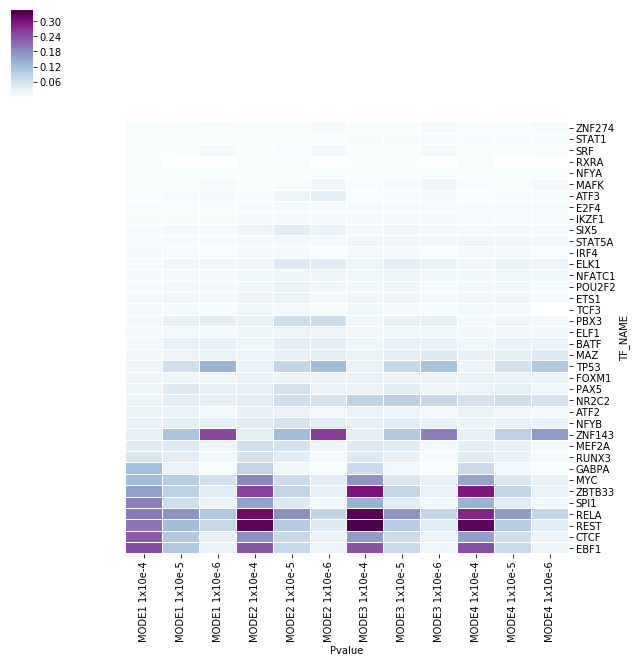

In [152]:
heat = sns.clustermap(prdf_piv_f1, linewidths=.01, row_cluster=False, col_cluster=False, cmap="BuPu")

In [43]:
prdf_piv_pre

Pvalue,MODE1 1x10e-4,MODE1 1x10e-5,MODE1 1x10e-6,MODE2 1x10e-4,MODE2 1x10e-5,MODE2 1x10e-6,MODE3 1x10e-4,MODE3 1x10e-5,MODE3 1x10e-6,MODE4 1x10e-4,MODE4 1x10e-5,MODE4 1x10e-6
TF_NAME,,,,,,,,,,,,
ZNF274,0.000095,0.000202,0.001742,0.000339,0.000505,0.003484,0.000203,0.000404,0.003484,0.000108,0.000303,0.002613
STAT1,0.000120,0.000160,0.000072,0.064599,0.065314,0.074229,0.185347,0.178789,0.196145,0.129954,0.120177,0.135366
SRF,0.000136,0.000526,0.002813,0.013921,0.048768,0.142053,0.009380,0.028945,0.085326,0.006216,0.018595,0.053915
RXRA,0.000144,0.000000,0.000000,0.106116,0.113124,0.107317,0.082989,0.092995,0.117073,0.033801,0.035829,0.053659
NFYA,0.000260,0.000238,0.000235,0.029255,0.026413,0.021895,0.034853,0.031825,0.027239,0.023408,0.021395,0.018809
MAFK,0.000262,0.000651,0.003156,0.042374,0.081639,0.182083,0.154382,0.186119,0.273853,0.111193,0.130390,0.197378
ATF3,0.000515,0.002563,0.005103,0.065012,0.136006,0.197663,0.032335,0.077308,0.111723,0.020753,0.052901,0.078555
E2F4,0.000972,0.001175,0.001137,0.152103,0.196227,0.191394,0.273707,0.336367,0.334684,0.247634,0.302524,0.301367
IKZF1,0.001664,0.001518,0.001538,0.191511,0.176429,0.164024,0.202516,0.190764,0.179062,0.167327,0.159734,0.151924


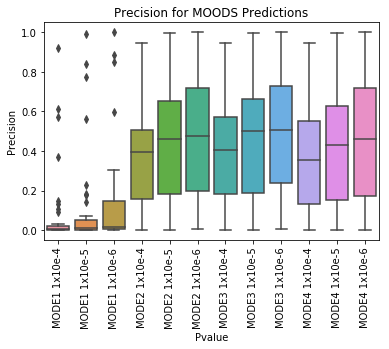

In [98]:
ax = sns.boxplot(data=prdf_piv_pre)
ax.set_title("Precision for MOODS Predictions")
ax.set(ylabel="Precision")
for item in ax.get_xticklabels():
    item.set_rotation(90)

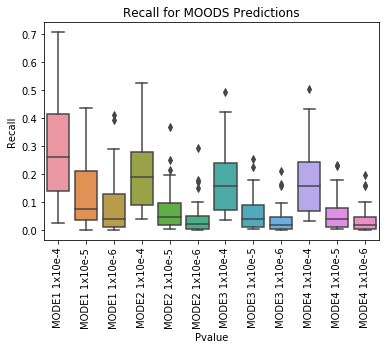

In [97]:
ax = sns.boxplot(data=prdf_piv_rec)
ax.set_title("Recall for MOODS Predictions")
ax.set(ylabel="Recall")
for item in ax.get_xticklabels():
    item.set_rotation(90)

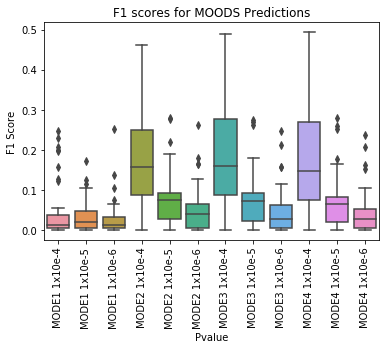

In [99]:
ax = sns.boxplot(data=prdf_piv_f1)
ax.set_title("F1 scores for MOODS Predictions")
ax.set(ylabel="F1 Score")
for item in ax.get_xticklabels():
    item.set_rotation(90)

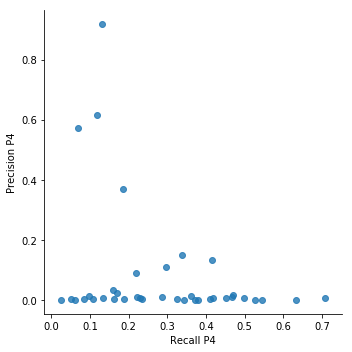

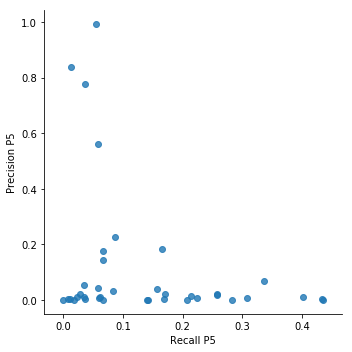

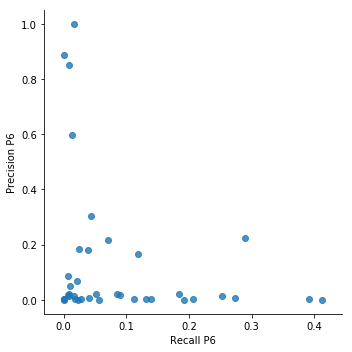

In [94]:
ax = sns.lmplot(y="Precision P4", x ="Recall P4", data=tmp_df, fit_reg=False)
ax = sns.lmplot(y="Precision P5", x ="Recall P5", data=tmp_df, fit_reg=False)
ax = sns.lmplot(y="Precision P6", x ="Recall P6", data=tmp_df, fit_reg=False)

In [83]:
tmp_df = pd.DataFrame()

In [91]:
tmp_df["Precision P4"] = prdf_piv_pre["MODE1 1x10e-4"]
tmp_df["Precision P5"] = prdf_piv_pre["MODE1 1x10e-5"]
tmp_df["Precision P6"] = prdf_piv_pre["MODE1 1x10e-6"]


In [92]:
tmp_df["Recall P4"] = prdf_piv_rec["MODE1 1x10e-4"]
tmp_df["Recall P5"] = prdf_piv_rec["MODE1 1x10e-5"]
tmp_df["Recall P6"] = prdf_piv_rec["MODE1 1x10e-6"]

In [86]:
tmp_df

,Precision,Recall
TF_NAME,,
ATF2,0.013014,0.098506
ATF3,0.000515,0.525773
BATF,0.006381,0.418759
CTCF,0.918892,0.131622
E2F4,0.000972,0.633466
EBF1,0.370198,0.186743
ELF1,0.005658,0.451151
ELK1,0.003788,0.187151
ETS1,0.004427,0.107143
